# Hypothesis Testing

In [1]:
# import libraries 
import numpy as np 
import matplotlib.pyplot as plt 
plt.rcParams.update({'font.size': 16}) 
import scipy.stats as stats
import savingfigR as sf

## 1 Sample t-test (Exmaple 1 cont'd)

In [2]:
t0 = (-0.61 - 0) / (1.62/(12)**(1/2))
alpha = 0.05
tcrit0 = stats.t.ppf(alpha, 12 - 1) # (alpha, df) - NOTICE alpha!
pval0 = stats.t.cdf(t0,12 - 1) # looking at LEFT tail
print(t0)

-1.3043839415024878


In [3]:
print(tcrit0)

-1.7958848187036696


In [4]:
print(pval0)

0.10936730608829183


## 1 Sample t-test (Example 2 cont'd)

In [5]:
t0 = (146-140)/(27/(157)**(1/2))
alpha = 0.05
tcrit0 = stats.t.ppf(1 - alpha, 157 - 1) # (1-alpha, n - 1) - NOTICE 1-alpha!
pval0 = 1 - stats.t.cdf(t0,157 - 1) # looking at RIGHT tail (1 - p)!
print(t0)

2.7844364635870376


In [6]:
print(tcrit0)

1.6546799956696048


In [7]:
print(pval0)

0.0030130775888571604


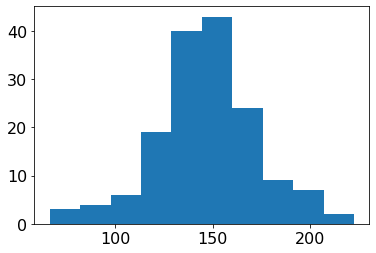

In [8]:
n1 = 157
alpha1 = 0.05
data1 = np.random.normal(loc=146, scale=27, size=(n1,))
fig = plt.figure()
plt.hist(data1)
plt.show()

sf.best_save(fig, 'example2hist')

In [9]:
t1 = (np.mean(data1) - 140) / (np.std(data1, ddof=1) / (157)**(1/2.))
tcrit1 = stats.t.ppf(1 - alpha1, n1 - 1)
pval1 = 1 - stats.t.cdf(t1,n1 - 1)
print(t1)

3.185394693945267


In [10]:
print(tcrit1)

1.6546799956696048


In [11]:
print(pval1)

0.0008729841243676484


In [12]:
stats.ttest_1samp(data1, popmean=140, alternative='greater')

Ttest_1sampResult(statistic=3.185394693945267, pvalue=0.0008729841243676697)

## 1 Sample t-test (Example 3 cont'd)

In [13]:
data2 = np.array([13,14,15,17,18,19,21,20,19,20])
alpha = 0.05
t2 = (np.mean(data2) - 15) / (np.std(data2, ddof=1) / (len(data2))**(1/2.))
tcrit2 = stats.t.ppf(alpha/2, len(data2)-1) # Left tail (alpha/2 = 0.025)
pval2 = 2*stats.t.cdf(-abs(t2),len(data2)-1) # -abs() do calc on left-tail
# multiply by 2 (accounting for both sided)
print(abs(t2))

2.9824045403173045


In [14]:
print(abs(tcrit2))

2.262157162740992


In [15]:
print(pval2)

0.015389410861615396


In [16]:
stats.ttest_1samp(data2, popmean=15, alternative='two-sided')

Ttest_1sampResult(statistic=2.982404540317305, pvalue=0.015389410861615396)

## 2 Sample Welch's t-test (Example 4 cont'd)

In [17]:
t4 = ((306.7 - 300.4)-(0-0))/(34.9**2 / 300 + 30.1**2 / 350)**(1/2)
alpha4 = 0.01
v4 = (34.9**2 / 300 + 30.1**2 / 350)**2 / (34.9**4 / (300**2 * (300 - 1)) + 30.1**4 / (350**2 * (350 - 1)))
tcrit4 = stats.t.ppf(alpha4/2, v4)
pval4 = 2*stats.t.cdf(-abs(t4),v4)
print(abs(t4))

2.4432862905445463


In [18]:
print(tcrit4)

-2.584121580018161


In [19]:
print(pval4)

0.014843933051431354


In [20]:
group1 = np.random.normal(loc=300.4, scale=34.9, size=(300,))
group2 = np.random.normal(loc=306.7, scale=30.1, size=(350,))
print(stats.ttest_ind(group1, group2, alternative='two-sided', equal_var=False)) # equal_var=Falase makes a welch test 

Ttest_indResult(statistic=-3.466836017227001, pvalue=0.000565946297282269)


## Paired t-test (Example 5 cont'd)

In [21]:
data5a = np.array([22,25,17,24,16,29,20,23,19,20])
data5b = np.array([18,21,16,22,19,24,17,21,23,18])
data5diff = data5a - data5b
t5 = (np.mean(data5diff) - 0) / (np.std(data5diff, ddof=1) / (len(data5diff))**(1/2.))
tcrit5 = stats.t.ppf(0.05/2, len(data5diff)-1)
pval5 = 2*stats.t.cdf(-abs(t5),len(data5diff)-1)
print(abs(t5))

1.7142857142857146


In [22]:
print(abs(tcrit5))

2.262157162740992


In [23]:
print(pval5)

0.12062074496836368


In [24]:
print(stats.ttest_rel(data5a, data5b))

Ttest_relResult(statistic=1.7142857142857144, pvalue=0.12062074496836378)


## Mann-Witney U Exmaple

In [25]:
alpha = 0.05
G1 = np.array([4,7,8,9,13,13,17,11])
G2 = np.array([23,6,3,24,17,14,24,29,13,33])
print(stats.wilcoxon(np.concatenate((G1, G2)), correction=True, mode='approx')) # not sure why this is wrong

WilcoxonResult(statistic=0.0, pvalue=0.00021187839828311125)


## Wilcoxon signed-rank Example

In [26]:
alpha = 0.05
Nr = 9
W = abs(1.5 + 1.5 - 3 - 4 - 5 - 6 + 7 + 8 + 9)
# calculate Wcrit (instead of lookup table)
# 0.05/2 = 2-tailed; 0.05 = 1 tailed
# Wcrit = -(qsignrank(alpha/2, Nr, lower.tail=FALSE)+1)+Nr*(Nr+1)/2 # unsure of python function for this
# W

In [27]:
G1 = np.array([125,115,130,140,140,115,140,125,140,135])
G2 = np.array([110,122,125,120,140,124,123,137,135,145])
print(stats.wilcoxon(G1, G2, alternative = "two-sided"))

WilcoxonResult(statistic=18.0, pvalue=0.5936305914425295)


/Users/duncan/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/duncan/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


## Bonferroni 

In [28]:
pvals = np.array([0.01, 0.02, 0.04])
adjusted = pvals * np.repeat(3, len(pvals)) # don't care about order 
print(adjusted)

[0.03 0.06 0.12]


## Holm-Bonferroni

In [29]:
pvals = np.array([0.01, 0.02, 0.04])
adjusted = pvals * np.linspace(len(pvals), 1, len(pvals)) # order matters here, but they are already in order so we don't need to order and re-order
print(adjusted)

[0.03 0.04 0.04]
